In [55]:
from classiq import *
import numpy as np

In [59]:

@qfunc
def main(work_q: Output[QBit], anc_q: Output[QArray[QBit]], t: CReal) -> None:
    allocate(1, work_q)
    allocate(2, anc_q)
    H(work_q)
    t = 1 # placeholder t value, untill range is created
    amps = np.array([1.0, t, - (t**2) / 2, (t**3) / 6]) # taylor coefficients
    amps = amps / np.linalg.norm(amps) #normalize
    inplace_prepare_amplitudes(amplitudes = amps.tolist(),bound = 0.01,target=anc_q) #prepare ancilla register

    # Control logic for phases
    control(anc_q[0], lambda: Y(work_q))
    control(anc_q[0], lambda: T(work_q))
    control(anc_q[1], lambda: SDG(work_q))

qprog = synthesize(main)
show(qprog)

Quantum program link: https://platform.classiq.io/circuit/3AJFHSDXRkayR2lkLAajmwN2ZA3


In [25]:
from classiq import ExecutionSession

# parameter list: one dict for each time
times = np.linspace(0, 1, 20)
params_list = [{"t": float(t)} for t in times]

# execute in a session
with ExecutionSession(qprog) as session:
    batch_results = session.batch_sample(params_list)


In [26]:
for i in batch_results:
    print(i)

vendor_format_result={} counts={'0': 1009, '1': 1039} counts_lsb_right=True probabilities={} parsed_states={'0': {'q': 0}, '1': {'q': 1}} histogram=None output_qubits_map={'q': (0,)} state_vector=None parsed_state_vector_states=None physical_qubits_map={'q': (0,)} num_shots=2048 output_type_map={'q': RegisterQuantumType(quantum_types=QuantumBit(source_ref=None, back_ref=None, kind='qbit'), size=1)} warnings=[]
vendor_format_result={} counts={'1': 1094, '0': 954} counts_lsb_right=True probabilities={} parsed_states={'1': {'q': 1}, '0': {'q': 0}} histogram=None output_qubits_map={'q': (0,)} state_vector=None parsed_state_vector_states=None physical_qubits_map={'q': (0,)} num_shots=2048 output_type_map={'q': RegisterQuantumType(quantum_types=QuantumBit(source_ref=None, back_ref=None, kind='qbit'), size=1)} warnings=[]
vendor_format_result={} counts={'0': 791, '1': 1257} counts_lsb_right=True probabilities={} parsed_states={'0': {'q': 0}, '1': {'q': 1}} histogram=None output_qubits_map={'q

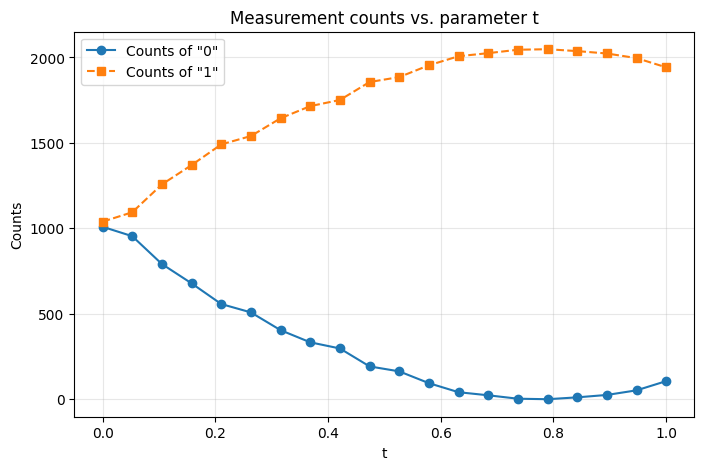

In [27]:
# Extract counts for the state
import matplotlib.pyplot as plt
counts_0 = [res.counts.get("0", 0) for res in batch_results]
counts_1 = [res.counts.get("1", 0) for res in batch_results]

# Plot
plt.figure(figsize=(8, 5))
plt.plot(times, counts_0, label='Counts of "0"', marker='o')
plt.plot(times, counts_1, label='Counts of "1"', marker='s', linestyle='--')

plt.xlabel("t")
plt.ylabel("Counts")
plt.title("Measurement counts vs. parameter t")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()